# Run the whole deltas algorithm

In [63]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

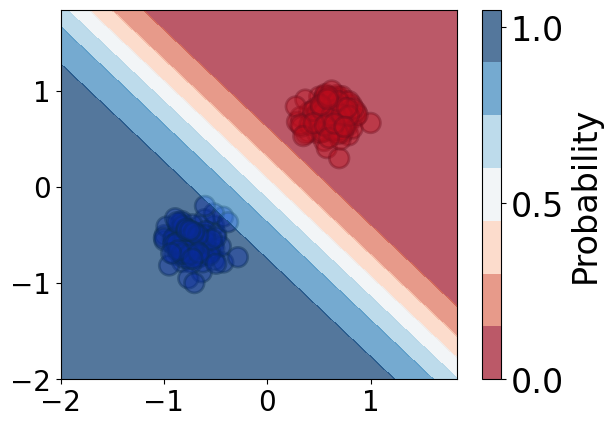

In [64]:
N1 = 100
N2 = 100
data_clf = pipeline.get_data_and_classifier(N1=N1, N2=N2)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

1.8755591904097055
0.7351438010592904
R1 empirical: 0.4062129351798268
R2 empirical: 0.32893086587946363


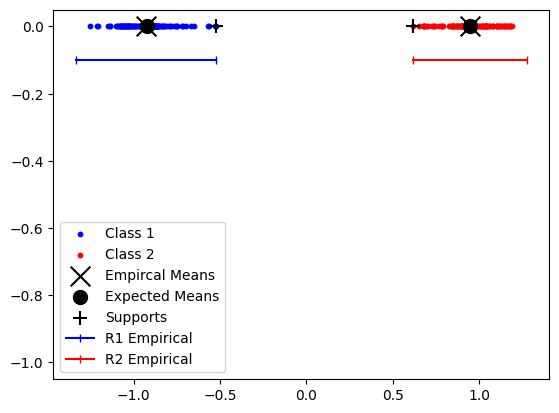

In [65]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'], data_test=data_clf['data_test'])

## set up extra parameters

In [66]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
data_info['N1'] = N1
data_info['N2'] = N2
pipeline.print_params(data_info)

Parameters
        R:  1.2504158512432721
        N1: 100
        N2: 100
        R1: 0.4062129351798268
        R2: 0.32893086587946363
        M:  1.140415389350415
        D:  1.8755591904097055
        C1: 1
        C2: 1


## Optimiser

-----------
optimising init deltas wrt. contraint
[       inf 2.80881063 2.76763206 ... 1.74047865 1.73901346 1.73547648] D: 1.8755591904097055
min: 1.0635360090605062e-05
1.917461490678479 D: 1.8755591904097055
1.9174968577797846 D: 1.8755591904097055
1.917461486200084 D: 1.8755591904097055
1.7354764820539081 D: 1.8755591904097055
1.7355118491552137 D: 1.8755591904097055
1.7355118491552137 D: 1.8755591904097055
1.8647989390273088 D: 1.8755591904097055
1.8648343061286143 D: 1.8755591904097055
1.864798933499379 D: 1.8755591904097055
1.8952091464806964 D: 1.8755591904097055
1.8952445135820017 D: 1.8755591904097055
1.8952091416793526 D: 1.8755591904097055
1.8745698675575488 D: 1.8755591904097055
1.8746052346588544 D: 1.8755591904097055
1.874569862309039 D: 1.8755591904097055
1.8883923340103732 D: 1.8755591904097055
1.8884277011116788 D: 1.8755591904097055
1.8883923290797235 D: 1.8755591904097055
1.8768320726166858 D: 1.8755591904097055
1.8768674397179912 D: 1.8755591904097055
1.8768320674

/home/matt/projects/linear_confidence/radius.py:11: RuntimeWarning: divide by zero encountered in divide
  error = (R_sup/np.sqrt(N)) * (2 + (np.sqrt( 2*np.log(1/delta) )))


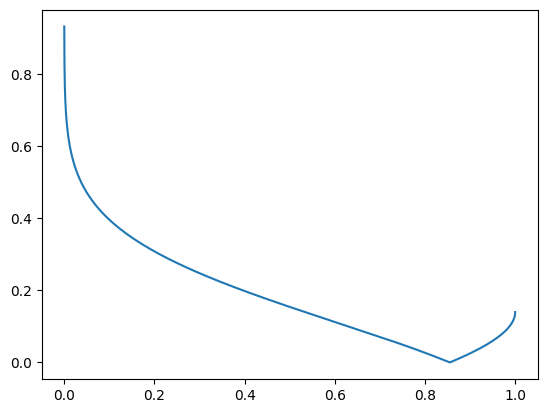

1.8755591930211866 D: 1.8755591904097055
constraint init: 2.6114810314226133e-09 should equal 0
1.8755591930211866 D: 1.8755591904097055
1.8755591930211866 D: 1.8755591904097055
1.8755591930211866 D: 1.8755591904097055
1.8756023657521932 D: 1.8755591904097055
1.875559185238366 D: 1.8755591904097055
delta1 : 1.0 
delta2: 0.8548058367742982
1.8755591930211866 D: 1.8755591904097055
constraint: 2.6114810314226133e-09 should equal 0
R1_est : 0.9063792756771357 
R2_est: 0.8290972063767725 
D_emp: 1.8755591904097055
1.8755591904097055
1.7354764820539081


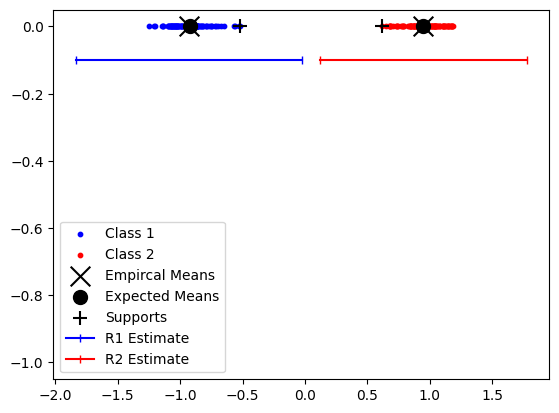

In [67]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation
loss_func = lambda delta, data_info: deltas.loss(delta[0], delta[1], data_info)

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8
 
delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, num_deltas=2)

# Evaluation on test data

In [68]:
pipeline.eval_test(data_clf, data_info, delta1, delta2)

original accuracy: 1.0
deltas   accuracy: 1.0


In [69]:
N1 = data_info['N1']
N2 = data_info['N2']
R1_emp = data_info['empirical R1']
R2_emp = data_info['empirical R2']
R = data_info['R all data']
D_emp = data_info['empirical D']

def error(R, N, d):
    return 2*(R/np.sqrt(N)) * (2 + np.sqrt(2*np.log(1/d)))

delta1 = 1
delta2 = 0.74
R1_est = R1_emp + error(R, N1, delta1)
R2_est = R2_emp + error(R, N2, delta2)

print(R1_est)
print(R2_est)
print('--- D ---')
print(D_emp)
print('--- R ---')
print(R1_emp+R2_emp)
print(error(R, N1, delta1) +
      error(R, N2, delta2))
print('--- C ---')
print(R1_emp+R2_emp + error(R, N1, delta1) +
      error(R, N2, delta2))
print('--- d ---')
B = D_emp - R2_emp - R1_emp - error(R, N1, delta1)
print(f'B: {B}')
# 2*(R/np.sqrt(N)) * (2 + np.sqrt(2*np.log(1/d))) = B
# (2 + np.sqrt(2*np.log(1/d))) = (B/2*(R/np.sqrt(N)))
# np.sqrt(2*np.log(1/d)) = (B/2*(R/np.sqrt(N))) - 2
# 2*np.log(1/d) = np.square((B/2*(R/np.sqrt(N))) - 2)
# np.log(1/d) = (np.square((B/2*(R/np.sqrt(N))) - 2) / 2)
# 1/d = np.exp((np.square((B/2*(R/np.sqrt(N))) - 2) / 2))
delta2 = 1/np.exp(0.5*(np.square(((B*np.sqrt(N2))/(2*R)) - 2)))
delta2 = deltas.delta2_given_delta1_matt(delta1, data_info)
# delta2 = np.exp(-np.square( (np.sqrt(N2)*B)/(2*np.sqrt(2)*R) -np.sqrt(2)))
# delta2 = np.exp(-0.5*np.square((np.sqrt(N2)*B)/(2*R) - 2))
# delta2 = deltas.delta2_given_delta1(delta1, data_info)
print(delta2)
print(error(R, N2, delta2))
print(2*(R/np.sqrt(N2)) * (2 + np.sqrt(2*np.log(1/delta2))))

0.9063792756771357
1.0231672549393749
--- D ---
1.8755591904097055
--- R ---
0.7351438010592904
1.1944027295572202
--- C ---
1.9295465306165105
--- d ---
B: 0.6402490488531061
0.8548058417742981
0.6402490488531062
0.6402490488531062


In [70]:
bounds = [[0, 0], [1, 1]]
delta_linspace = 10
delta1s = np.linspace(bounds[0][0], bounds[1][0], delta_linspace)
delta2s = np.linspace(bounds[0][1], bounds[1][1], delta_linspace)

delta1s

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])